# Modeling and Simulation in Python

Chapter 10: Vectors

Copyright 2017 Allen Downey

License: [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0)


We'll start with the same code we saw last time: the magic command that tells Jupyter where to put the figures, and the import statement that gets the function defined in the `modsim` module.

In [1]:
# If you want the figures to appear in the notebook, 
# and you want to interact with them, use
# %matplotlib notebook

# If you want the figures to appear in the notebook, 
# and you don't want to interact with them, use
# %matplotlib inline

# If you want the figures to appear in separate windows, use
# %matplotlib qt|

# tempo switch from one to another, you have to select Kernel->Restart

%matplotlib notebook

from modsim import *

### Vectors

In [2]:
m = UNITS.meter
s = UNITS.second
kg = UNITS.kilogram


In [3]:
A = Vector(3, 4) * m

In [4]:
A.x

<Quantity(3.0, 'meter')>

In [5]:
A.y

<Quantity(4.0, 'meter')>

In [6]:
A.mag

<Quantity(5.0, 'meter')>

In [7]:
A.angle

<Quantity(0.9272952180016122, 'radian')>

In [8]:
B = Vector(1, 2) * m

In [9]:
A + B

<Quantity([ 4.  6.], 'meter')>

In [10]:
A - B

<Quantity([ 2.  2.], 'meter')>

In [11]:
A.dist(B)

<Quantity(2.8284271247461903, 'meter')>

In [12]:
A.diff_angle(B)

<Quantity(-0.17985349979247822, 'radian')>

In [13]:
mag = A.mag
angle = A.angle

In [14]:
x, y = pol2cart(angle, mag)
Vector(x, y)

<Quantity([ 3.  4.], 'meter')>

### Baseball

In [15]:
degree = UNITS.degree
radian = UNITS.radian

In [16]:
angle = 45 * degree
angle

<Quantity(45, 'degree')>

In [17]:
angle_rad = angle.to(radian)
angle_rad

<Quantity(0.7853981633974483, 'radian')>

In [18]:
angle_rad.to(radian)

<Quantity(0.7853981633974483, 'radian')>

In [19]:
angle_rad.to(degree)

<Quantity(45.0, 'degree')>

In [20]:
condition = Condition(x = 0 * m, 
                      y = 1 * m,
                      g = 9.8 * m/s**2,
                      mass = 145e-3 * kg,
                      diameter = 73e-3 * m,
                      rho = 1.2 * kg/m**3,
                      C_d = 0.3,
                      angle = 45 * degree,
                      velocity = 40 * m / s,
                      duration = 5.1 * s)

In [21]:
def make_system(condition):
    """Make a system object.
    
    condition: Condition object with angle, velocity, x, y,
               diameter, duration, g, mass, rho, and C_d
               
    returns: System object
    """
    unpack(condition)
    
    # convert angle to degrees
    theta = np.deg2rad(angle)
    
    # compute x and y components of velocity
    vx, vy = pol2cart(theta, velocity)
    
    # make the initial state
    init = State(x=x, y=y, vx=vx, vy=vy)
    
    # compute area from diameter
    area = np.pi * (diameter/2)**2
    
    # compute timestamps
    ts = linspace(0, duration, 101)
    
    return System(init=init, g=g, mass=mass, 
                  area=area, rho=rho, C_d=C_d, ts=ts)

In [22]:
system = make_system(condition)
system.init

,value
x,0 meter
y,1 meter
vx,28.284271247461902 meter / second
vy,28.2842712474619 meter / second


In [23]:
def slope_func(state, t, system):
    x, y, vx, vy = state
    unpack(system)
    
    a_grav = Vector(0, -g)

    v = Vector(vx, vy)
    
    f_drag = -rho * v.mag * v * C_d * area / 2
    a_drag = f_drag / mass
    
    a = a_grav + a_drag
    
    return vx, vy, a.x, a.y

In [24]:
slope_func(system.init, 0, system)

(<Quantity(28.284271247461902, 'meter / second')>,
 <Quantity(28.2842712474619, 'meter / second')>,
 <Quantity(-5.878209892331404, 'meter / second ** 2')>,
 <Quantity(-15.678209892331404, 'meter / second ** 2')>)

In [25]:
run_odeint(system, slope_func)

In [26]:
system.results.head()

,x,y,vx,vy
0.000,0.000000,1.000000,28.284271,28.284271
0.051,1.434929,2.422229,27.988924,27.491730
0.102,2.855017,3.804389,27.702226,26.712880
0.153,4.260697,5.147165,27.423836,25.947141
0.204,5.652384,6.451211,27.153433,25.193958


In [27]:
system.results.tail()

,x,y,vx,vy
4.896,100.274761,3.580383,15.135822,-21.336469
4.947,101.044011,2.483281,15.030816,-21.686507
4.998,101.807902,1.368423,14.925643,-22.032810
5.049,102.566424,0.235998,14.820318,-22.375365
5.100,103.319572,-0.913800,14.714856,-22.714157


In [28]:
xs = system.results.x
ys = system.results.y

<IPython.core.display.Javascript object>


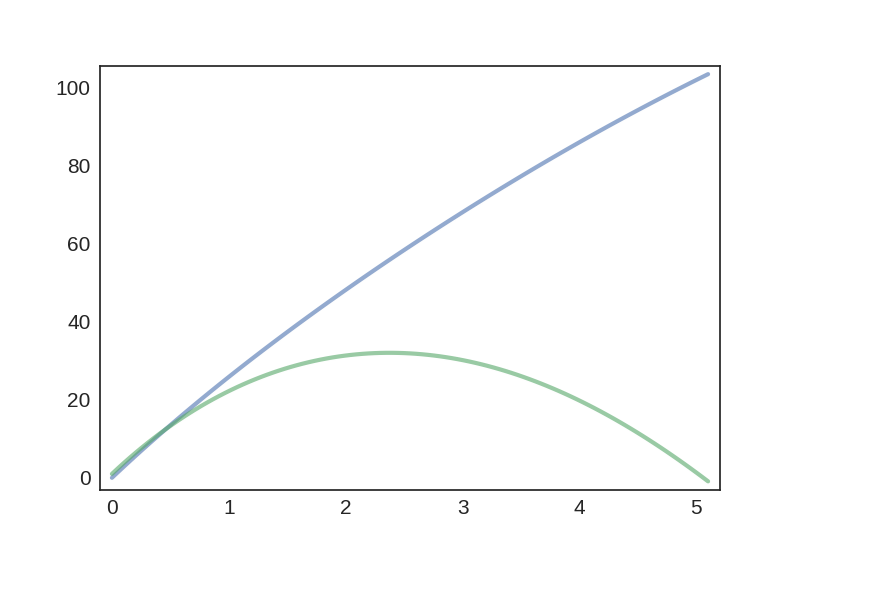

Saving figure to file chap10-fig01.pdf


In [29]:
newfig()
plot(xs, label='x')
plot(ys, label='y')

decorate(xlabel='Time (s)',
         ylabel='Position (m)')

savefig('chap10-fig01.pdf')

In [30]:
vxs = system.results.vx
vys = system.results.vy

<IPython.core.display.Javascript object>


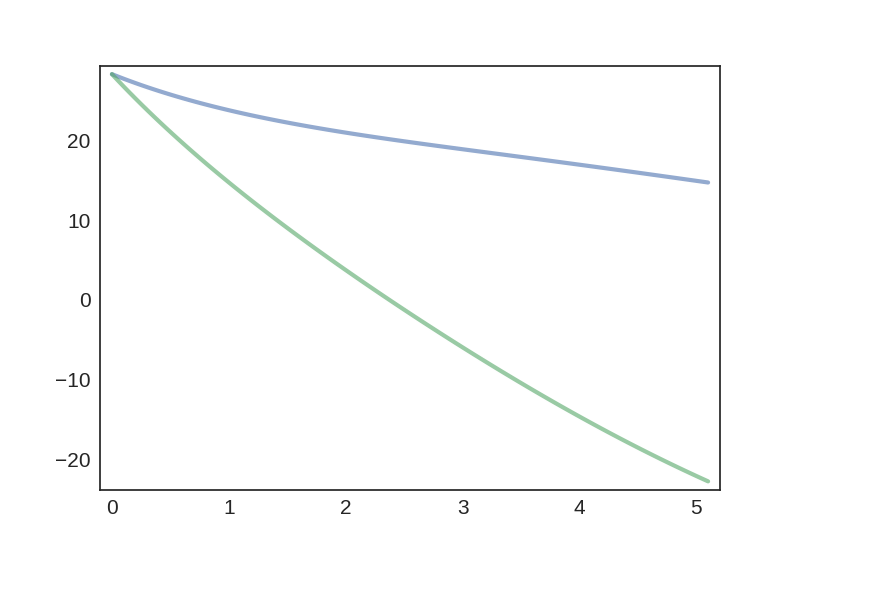

In [31]:
newfig()
plot(vxs, label='vx')
plot(vys, label='vy')

decorate(xlabel='Time (s)',
         ylabel='Velocity (m/s)')

<IPython.core.display.Javascript object>


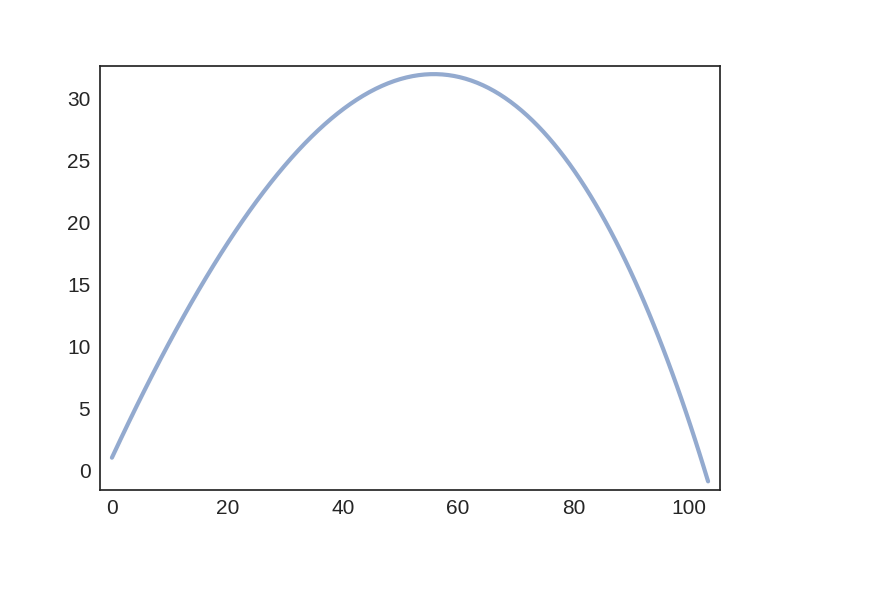

Saving figure to file chap10-fig02.pdf


In [32]:
newfig()
plot(xs, ys, label='trajectory')

decorate(xlabel='x position (m)',
         ylabel='y position (m)')

savefig('chap10-fig02.pdf')

<IPython.core.display.Javascript object>


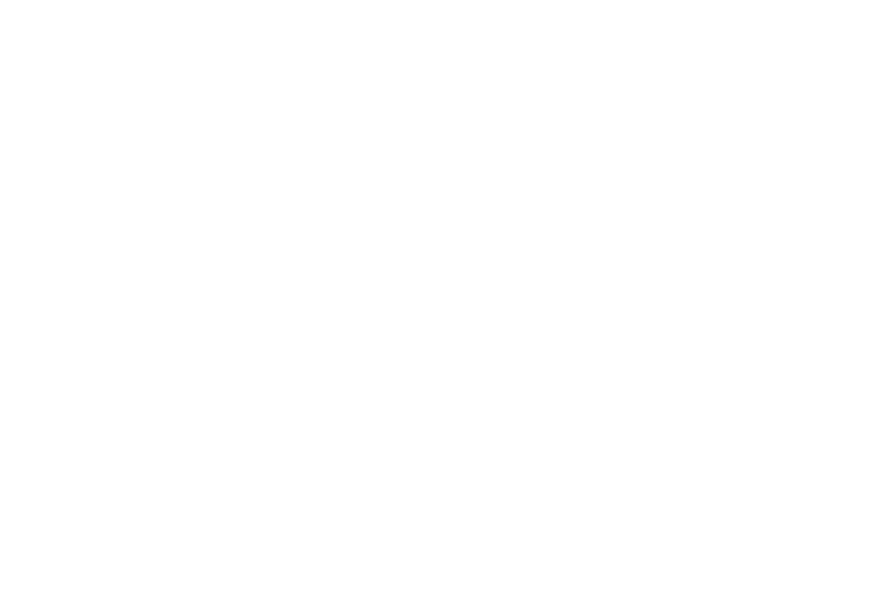

/home/downey/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


In [33]:
newfig()
plt.quiver(xs, ys, vxs, vys, 
           pivot='middle', width=0.003, headwidth=5, color='green')
plt.axis('equal')

decorate(xlabel='x position (m)',
         ylabel='y position (m)')

<IPython.core.display.Javascript object>


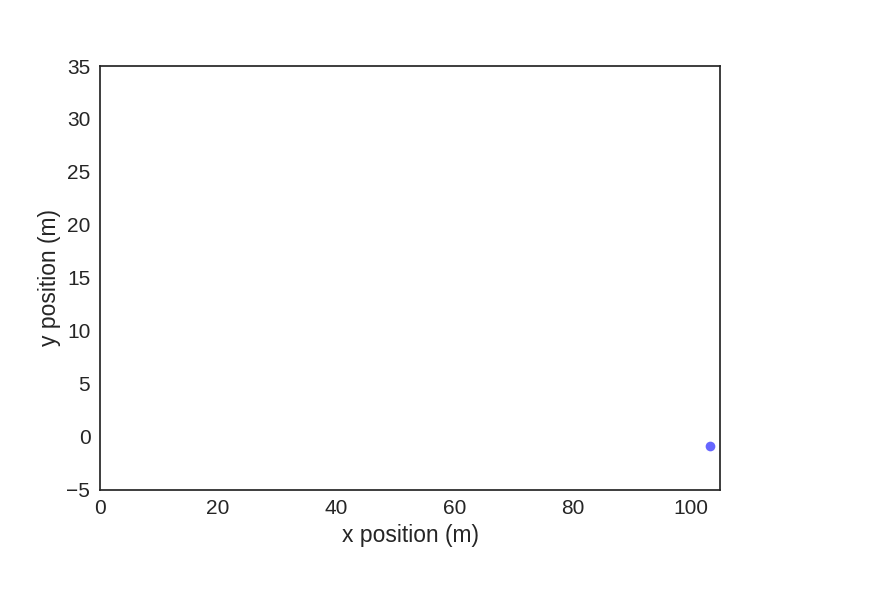

In [34]:
newfig()
decorate(xlabel='x position (m)',
         ylabel='y position (m)',
         xlim=[0, 105],
         ylim=[-5, 35],
         legend=False)

for x, y in zip(xs, ys):
    plot(x, y, 'bo', update=True)
    sleep(0.01)

In [35]:
def animate2d(xs, ys, speedup=1):
    """Animate the results of a projectile simulation.
    
    xs: x position as a function of time
    ys: y position as a function of time
    
    speedup: how much to divide `dt` by
    """
    # get the time intervals between elements
    ts = xs.index
    dts = np.diff(ts)
    dts = np.append(dts, 0)

    # decorate the plot
    newfig()
    decorate(xlabel='x position (m)',
             ylabel='y position (m)',
             xlim=[xs.min(), xs.max()],
             ylim=[ys.min(), ys.max()],
             legend=False)

    # loop through the values
    for x, y, dt in zip(xs, ys, dts):
        plot(x, y, 'bo', update=True)
        sleep(dt / speedup)

In [36]:
# animate2d(system.results.x, system.results.y)

### Finding the range

In [49]:
condition.set(duration=7*s)
system = make_system(condition)
run_odeint(system, slope_func)

In [50]:
def interpolate_range(results):
    xs = results.x
    ys = results.y
    t_end = ys.index[-1]
    
    if ys[t_end] > 0:
        msg = """The final value of y is still positive;
                 looks like the simulation didn't run
                 long enough."""
        raise ValueError(msg)
        
    t_peak = ys.argmax()
    descent = ys.loc[t_peak:]
    T = interp_inverse(descent, kind='cubic')
    
    t_landing = T(0)
    X = interpolate(xs, kind='cubic')
    return X(t_landing)

In [51]:
interpolate_range(system.results)

array(86.32037231617413)

In [52]:
def range_func(angle, condition):    
    condition.set(angle=angle)
    system = make_system(condition)
    run_odeint(system, slope_func)
    x_range = interpolate_range(system.results)
    return x_range

In [53]:
%time range_func(45, condition)

CPU times: user 628 ms, sys: 0 ns, total: 628 ms
Wall time: 621 ms


array(102.72237841710873)

In [54]:
angles = linspace(30, 60, 11)
sweep = Sweep()

for angle in angles:
    x_range = range_func(angle, condition)
    print(angle, x_range)
    sweep[angle] = x_range

30.0 97.0977479476824
33.0 100.08910744882509
36.0 102.12802725534989
39.0 103.23445991233197
42.0 103.42684240849546
45.0 102.72237841710873
48.0 101.13744083917668
51.0 98.68805053605158
54.0 95.39043242210353
57.0 91.26165364608089
60.0 86.32037231617413


<IPython.core.display.Javascript object>


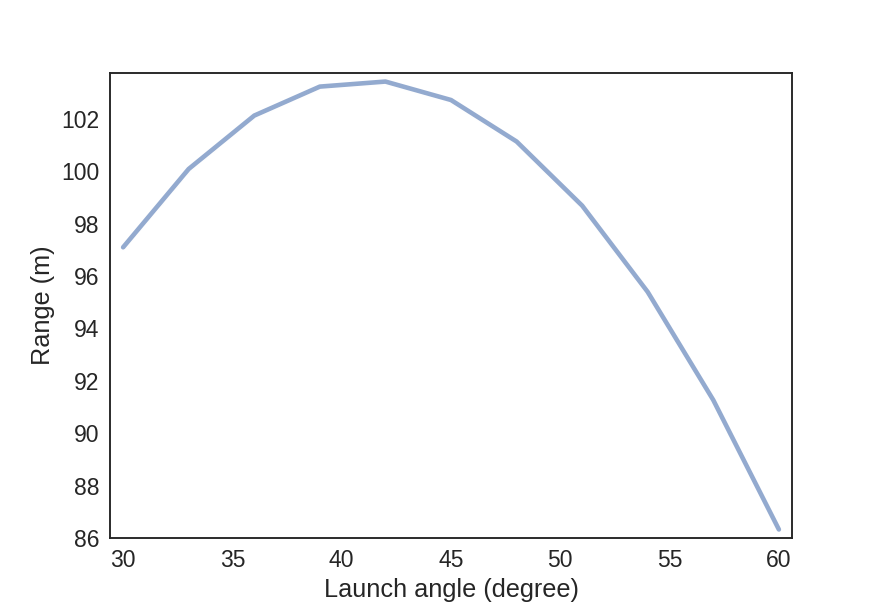

Saving figure to file chap10-fig03.pdf


In [55]:
newfig()
plot(sweep)
decorate(xlabel='Launch angle (degree)',
         ylabel='Range (m)',
         legend=False)

savefig('chap10-fig03.pdf')

In [60]:
res = max_bounded(range_func, [0, 90], condition)

In [61]:
type(res)

scipy.optimize.optimize.OptimizeResult

In [62]:
res

     fun: -103.46412613061268
 message: 'Solution found.'
    nfev: 9
  status: 0
 success: True
       x: 41.136412740663125

In [63]:
condition = Condition(g = 9.8,
                      mass = 145e-3,
                      diameter = 73e-3,
                      rho = 1.2,
                      C_d = 0.3,
                      angle = 45,
                      velocity = 40,
                      duration = 7)

In [64]:
%time range_func(45, condition)

CPU times: user 128 ms, sys: 0 ns, total: 128 ms
Wall time: 125 ms


array(102.72237841710873)

In [65]:
%time res = max_bounded(range_func, [0, 90], condition)

CPU times: user 696 ms, sys: 8 ms, total: 704 ms
Wall time: 697 ms


In [66]:
def height_func(angle, condition):
    print(angle)
    
    condition.set(angle=angle)
    system = make_system(condition)
    run_odeint(system, slope_func)
    
    T = interp_inverse(system.results.x)
    t_wall = T(94.5)
    
    Y = interpolate(system.results.y)
    return Y(t_wall)

In [67]:
height_func(45, condition)

45


array(11.025366370141436)

In [68]:
res = max_bounded(height_func, [0, 90], condition)

45.0
34.3769410125
55.6230589875
21.246117975
40.0964091144
41.9865507741
47.1952334237
44.3729100433
44.4032473114
44.7851090803
44.5491055281
44.5981636814
44.5182828592
44.4743431899
44.517819974
44.5269242948
44.5215835939
44.5199261681
44.5202601618
44.5195921744


In [69]:
angle = res.x
height = height_func(angle, condition)
height

44.5199261681


array(11.045254540112227)

In [70]:
def best_height(velocity, condition):
    condition.set(velocity=velocity)
    res = max_bounded(height_func, [0, 90], condition)
    
    angle = res.x
    height = height_func(angle, condition)
    return height

In [71]:
best_height(40, condition)

45.0
34.3769410125
55.6230589875
21.246117975
40.0964091144
41.9865507741
47.1952334237
44.3729100433
44.4032473114
44.7851090803
44.5491055281
44.5981636814
44.5182828592
44.4743431899
44.517819974
44.5269242948
44.5215835939
44.5199261681
44.5202601618
44.5195921744
44.5199261681


array(11.045254540112227)

In [72]:
def error_func(velocity, condition):
    height = best_height(velocity, condition)
    return height - 11

In [73]:
error_func(40, condition)

45.0
34.3769410125
55.6230589875
21.246117975
40.0964091144
41.9865507741
47.1952334237
44.3729100433
44.4032473114
44.7851090803
44.5491055281
44.5981636814
44.5182828592
44.4743431899
44.517819974
44.5269242948
44.5215835939
44.5199261681
44.5202601618
44.5195921744
44.5199261681


0.045254540112226849

In [74]:
min_velocity = fsolve(error_func, 40, condition)

45.0
34.3769410125
55.6230589875
21.246117975
40.0964091144
41.9865507741
47.1952334237
44.3729100433
44.4032473114
44.7851090803
44.5491055281
44.5981636814
44.5182828592
44.4743431899
44.517819974
44.5269242948
44.5215835939
44.5199261681
44.5202601618
44.5195921744
44.5199261681
45.0
34.3769410125
55.6230589875
21.246117975
40.0964091144
41.9865507741
47.1952334237
44.3729100433
44.4032473114
44.7851090803
44.5491055281
44.5981636814
44.5182828592
44.4743431899
44.517819974
44.5269242948
44.5215835939
44.5199261681
44.5202601618
44.5195921744
44.5199261681
45.0
34.3769410125
55.6230589875
21.246117975
40.0964091144
41.9865507741
47.1952334237
44.3729100433
44.4032473114
44.7851090803
44.5491055281
44.5981636814
44.5182828592
44.4743431899
44.517819974
44.5269242948
44.5215835939
44.5199261681
44.5202601618
44.5195921744
44.5199261681
45.0
34.3769410125
55.6230589875
21.246117975
40.0964091144
41.9865507741
47.1952334237
44.3729100433
44.4032473114
44.7851090803
44.5491055281
44.5981

In [75]:
min_velocity

array([ 39.98870758])

In [76]:
best_height(min_velocity, condition)

45.0
34.3769410125
55.6230589875
21.246117975
40.077674382
41.9731436079
47.1869473394
44.3597781642
44.3904172148
44.773560804
44.5367650433
44.5793373078
44.5041005818
44.4606773996
44.5045373035
44.5135691483
44.5079871612
44.5061046434
44.5064386369
44.50577065
44.5061046434


array(11.00000000000382)